In [14]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Create Spark session
spark = SparkSession.builder \
    .appName("CreditCardETL") \
    .getOrCreate()

# Read JSON files
customer_df = spark.read.option("multiline", True).json("cdw_sapp_customer.json")
creditcard_df = spark.read.option("multiline", True).json("cdw_sapp_credit.json")
branch_df = spark.read.option("multiline", True).json("cdw_sapp_branch.json")

# Show schema and preview data
print("branch_df")
branch_df.printSchema()
branch_df.show(5)
print("creditcard_df")
creditcard_df.printSchema()
creditcard_df.show(5)
print("customer_df")
customer_df.printSchema()
customer_df.show(5)

branch_df
root
 |-- BRANCH_CITY: string (nullable = true)
 |-- BRANCH_CODE: long (nullable = true)
 |-- BRANCH_NAME: string (nullable = true)
 |-- BRANCH_PHONE: string (nullable = true)
 |-- BRANCH_STATE: string (nullable = true)
 |-- BRANCH_STREET: string (nullable = true)
 |-- BRANCH_ZIP: long (nullable = true)
 |-- LAST_UPDATED: string (nullable = true)

+-----------------+-----------+------------+------------+------------+-----------------+----------+--------------------+
|      BRANCH_CITY|BRANCH_CODE| BRANCH_NAME|BRANCH_PHONE|BRANCH_STATE|    BRANCH_STREET|BRANCH_ZIP|        LAST_UPDATED|
+-----------------+-----------+------------+------------+------------+-----------------+----------+--------------------+
|        Lakeville|          1|Example Bank|  1234565276|          MN|     Bridle Court|     55044|2018-04-18T16:51:...|
|          Huntley|          2|Example Bank|  1234618993|          IL|Washington Street|     60142|2018-04-18T16:51:...|
|SouthRichmondHill|          3|Exam

In [13]:
# from pyspark.sql.functions import col, lit, when, format_string, substring
# from pyspark.sql.functions import *
# from pyspark.sql import SparkSession
# from pyspark.sql.functions import col, lit, when, format_string, substring

# # Initialize Spark session
# spark = SparkSession.builder.appName("Data Transformation").getOrCreate()

# # Load the JSON file into a DataFrame
# branch_df = spark.read.option("multiline", True).json("cdw_sapp_branch.json")

# # Data transformation according to the mapping document
# branch_df_transformed = branch_df \
#     .withColumn("BRANCH_CODE", col("BRANCH_CODE").cast("int")) \
#     .withColumn("BRANCH_NAME", col("BRANCH_NAME").cast("string")) \
#     .withColumn("BRANCH_STREET", col("BRANCH_STREET").cast("string")) \
#     .withColumn("BRANCH_CITY", col("BRANCH_CITY").cast("string")) \
#     .withColumn("BRANCH_STATE", col("BRANCH_STATE").cast("string")) \
#     .withColumn("BRANCH_ZIP", when(col("BRANCH_ZIP").isNull(), lit("999999")).otherwise(col("BRANCH_ZIP")).cast("string")) \
#     .withColumn(
#         "BRANCH_PHONE",
#         format_string(
#             "(%s)%s-%s",
#             substring(col("BRANCH_PHONE").cast("string"), 1, 3),
#             substring(col("BRANCH_PHONE").cast("string"), 4, 3),
#             substring(col("BRANCH_PHONE").cast("string"), 7, 4)
#         ).cast("string")
#     ) \
#     .withColumn("LAST_UPDATED", col("LAST_UPDATED").cast("timestamp"))

# # Show transformed DataFrame
# branch_df_transformed.show()

# print("branch_df_transformed")
# branch_df_transformed.printSchema()








from pyspark.sql.functions import col, lit, when, format_string, substring, lpad
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName("Data Transformation").getOrCreate()

# Load the JSON file into a DataFrame
branch_df = spark.read.option("multiline", True).json("cdw_sapp_branch.json")

# Data transformation according to the mapping document
branch_df_transformed = branch_df \
    .withColumn("BRANCH_CODE", col("BRANCH_CODE").cast("int")) \
    .withColumn("BRANCH_NAME", col("BRANCH_NAME").cast("string")) \
    .withColumn("BRANCH_STREET", col("BRANCH_STREET").cast("string")) \
    .withColumn("BRANCH_CITY", col("BRANCH_CITY").cast("string")) \
    .withColumn("BRANCH_STATE", col("BRANCH_STATE").cast("string")) \
    .withColumn("BRANCH_ZIP", when(col("BRANCH_ZIP").isNull(), lit("999999")).otherwise(lpad(col("BRANCH_ZIP"), 5, '0')).cast("string")) \
    .withColumn(
        "BRANCH_PHONE",
        format_string(
            "(%s)%s-%s",
            substring(col("BRANCH_PHONE").cast("string"), 1, 3),
            substring(col("BRANCH_PHONE").cast("string"), 4, 3),
            substring(col("BRANCH_PHONE").cast("string"), 7, 4)
        ).cast("string")
    ) \
    .withColumn("LAST_UPDATED", col("LAST_UPDATED").cast("timestamp"))

# Show transformed DataFrame
branch_df_transformed.show()

print("branch_df_transformed")
branch_df_transformed.printSchema()












# Explanation:
# Column Casting:

# Used .cast("string") instead of .cast("varchar(64)") since Spark uses string for text data type.
# Phone Number Formatting:

# Ensured phone number formatting remains consistent and readable.
# Null Handling:

# Kept the when condition for handling NULL in BRANCH_ZIP and replaced varchar(64) with string.
# This version maintains the functionality of the original while improving readability and adhering to common practices in PySpark data frame manipulations.









+-----------------+-----------+------------+-------------+------------+-------------------+----------+-------------------+
|      BRANCH_CITY|BRANCH_CODE| BRANCH_NAME| BRANCH_PHONE|BRANCH_STATE|      BRANCH_STREET|BRANCH_ZIP|       LAST_UPDATED|
+-----------------+-----------+------------+-------------+------------+-------------------+----------+-------------------+
|        Lakeville|          1|Example Bank|(123)456-5276|          MN|       Bridle Court|     55044|2018-04-18 16:51:47|
|          Huntley|          2|Example Bank|(123)461-8993|          IL|  Washington Street|     60142|2018-04-18 16:51:47|
|SouthRichmondHill|          3|Example Bank|(123)498-5926|          NY|      Warren Street|     11419|2018-04-18 16:51:47|
|       Middleburg|          4|Example Bank|(123)466-3064|          FL|   Cleveland Street|     32068|2018-04-18 16:51:47|
|    KingOfPrussia|          5|Example Bank|(123)484-9701|          PA|        14th Street|     19406|2018-04-18 16:51:47|
|         Paters

In [15]:
from pyspark.sql.functions import col, concat, lpad


from pyspark.sql import SparkSession
from pyspark.sql.functions import col, concat, lpad

# Initialize Spark session
spark = SparkSession.builder.appName("Data Transformation").getOrCreate()

# Load the JSON file into a DataFrame
creditcard_df = spark.read.option("multiline", True).json("cdw_sapp_credit.json")

# Data transformation according to the mapping document
# creditcard_df_transformed = creditcard_df \
#     .withColumn("CUST_CC_NO", col("CREDIT_CARD_NO").cast("string")) \
#     .withColumn(
#         "TIMEID", 
#         concat(
#             col("YEAR"), 
#             lpad(col("MONTH"), 2, '0'), 
#             lpad(col("DAY"), 2, '0')
#         ).cast("string")
#     ) \
#     .withColumn("CUST_SSN", col("CUST_SSN").cast("int")) \
#     .withColumn("BRANCH_CODE", col("BRANCH_CODE").cast("int")) \
#     .withColumn("TRANSACTION_TYPE", col("TRANSACTION_TYPE").cast("string")) \
#     .withColumn("TRANSACTION_VALUE", col("TRANSACTION_VALUE").cast("double")) \
#     .withColumn("TRANSACTION_ID", col("TRANSACTION_ID").cast("int"))


creditcard_df_transformed = creditcard_df \
    .withColumn("CUST_CC_NO", col("CREDIT_CARD_NO").cast("varchar(64)")) \
    .withColumn("TIMEID", concat(
        col("YEAR"),
        lpad(col("MONTH"), 2, '0'),
        lpad(col("DAY"), 2, '0')
    ).cast("string")) \
    .withColumn("CUST_SSN", col("CUST_SSN").cast("int")) \
    .withColumn("BRANCH_CODE", col("BRANCH_CODE").cast("int")) \
    .withColumn("TRANSACTION_TYPE", col("TRANSACTION_TYPE").cast("varchar(64)")) \
    .withColumn("TRANSACTION_VALUE", col("TRANSACTION_VALUE").cast("double")) \
    .withColumn("TRANSACTION_ID", col("TRANSACTION_ID").cast("int")) \

# Show transformed DataFrame
creditcard_df_transformed.show()

# Print schema of the transformed DataFrame
creditcard_df_transformed.printSchema()






# Column Casting:

# Changed .cast("varchar(64)") to .cast("string") since Spark uses string for text data types.
# Time ID Column:

# Used concat and lpad to create the TIMEID column by concatenating the YEAR, MONTH, and DAY columns and padding MONTH and DAY with leading zeros to ensure two digits.


+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+----------------+--------+
|BRANCH_CODE|  CREDIT_CARD_NO| CUST_SSN|DAY|MONTH|TRANSACTION_ID|TRANSACTION_TYPE|TRANSACTION_VALUE|YEAR|      CUST_CC_NO|  TIMEID|
+-----------+----------------+---------+---+-----+--------------+----------------+-----------------+----+----------------+--------+
|        114|4210653349028689|123459988| 14|    2|             1|       Education|             78.9|2018|4210653349028689|20180214|
|         35|4210653349028689|123459988| 20|    3|             2|   Entertainment|            14.24|2018|4210653349028689|20180320|
|        160|4210653349028689|123459988|  8|    7|             3|         Grocery|             56.7|2018|4210653349028689|20180708|
|        114|4210653349028689|123459988| 19|    4|             4|   Entertainment|            59.73|2018|4210653349028689|20180419|
|         93|4210653349028689|123459988| 10|   10|             5|           

In [16]:


from pyspark.sql.functions import col, initcap, lower, concat, lit, format_string, substring



from pyspark.sql import SparkSession
from pyspark.sql.functions import col, initcap, lower, concat, lit, format_string, substring


from pyspark.sql import SparkSession
from pyspark.sql.functions import col, initcap, lower, concat, lit, format_string, substring

# # Initialize Spark session
# spark = SparkSession.builder.appName("Data Transformation").getOrCreate()

# Load the JSON file into a DataFrame
# customer_df = spark.read.option("multiline", True).json("cdw_sapp_customer.json")

# # Data transformation according to the mapping document
# customer_df_transformed = customer_df \
#     .withColumn("SSN", col("SSN").cast("int")) \
#     .withColumn("FIRST_NAME", initcap(col("FIRST_NAME")).cast("string")) \
#     .withColumn("MIDDLE_NAME", lower(col("MIDDLE_NAME")).cast("string")) \
#     .withColumn("LAST_NAME", initcap(col("LAST_NAME")).cast("string")) \
#     .withColumn("CREDIT_CARD_NO", col("CREDIT_CARD_NO").cast("string")) \
#     .withColumn("FULL_STREET_ADDRESS", concat(col("STREET_NAME"), lit(", "), col("APT_NO")).cast("string")) \
#     .withColumn("CUST_CITY", col("CUST_CITY").cast("string")) \
#     .withColumn("CUST_STATE", col("CUST_STATE").cast("string")) \
#     .withColumn("CUST_COUNTRY", col("CUST_COUNTRY").cast("string")) \
#     .withColumn("CUST_ZIP", col("CUST_ZIP").cast("string")) \
#     .withColumn(
#         "CUST_PHONE",
#         format_string(
#             "(%s)%s-%s",
#             substring(col("CUST_PHONE").cast("string"), 1, 3),
#             substring(col("CUST_PHONE").cast("string"), 4, 3),
#             substring(col("CUST_PHONE").cast("string"), 4, 4)
#         ).cast("string")
#     ) \
#     .withColumn("CUST_EMAIL", col("CUST_EMAIL").cast("string")) \
#     .withColumn("LAST_UPDATED", col("LAST_UPDATED").cast("timestamp"))

# # Show transformed DataFrame
# customer_df_transformed.show()

# # Print schema of the transformed DataFrame
# customer_df_transformed.printSchema()



# customer table("dw_sapp_customer")
customer_df_transformed = customer_df \
    .withColumn("SSN", col("SSN").cast("int")) \
    .withColumn("FIRST_NAME", initcap(col("FIRST_NAME")).cast("varchar(64)")) \
    .withColumn("MIDDLE_NAME", lower(col("MIDDLE_NAME")).cast("varchar(64)")) \
    .withColumn("LAST_NAME", initcap(col("LAST_NAME")).cast("varchar(64)")) \
    .withColumn("CREDIT_CARD_NO", col("CREDIT_CARD_NO").cast("varchar(64)")) \
    .withColumn("FULL_STREET_ADDRESS", concat(col("STREET_NAME"), lit(", "), col("APT_NO")).cast("varchar(64)")) \
    .withColumn("CUST_CITY", col("CUST_CITY").cast("varchar(64)")) \
    .withColumn("CUST_STATE", col("CUST_STATE").cast("varchar(64)")) \
    .withColumn("CUST_COUNTRY", col("CUST_COUNTRY").cast("varchar(64)")) \
    .withColumn("CUST_ZIP", col("CUST_ZIP").cast("varchar(64)")) \
    .withColumn("CUST_PHONE", format_string("(%s)%s-%s", 
                                             substring(col("CUST_PHONE").cast("varchar(64)"), 1, 3), 
                                             substring(col("CUST_PHONE").cast("varchar(64)"), 4, 3), 
                                             substring(col("CUST_PHONE").cast("varchar(64)"), 4, 4)).cast("varchar(64)")) \
    .withColumn("CUST_EMAIL", col("CUST_EMAIL").cast("varchar(64)")) \
    .withColumn("LAST_UPDATED", col("LAST_UPDATED").cast("timestamp"))

# Show transformed DataFrame
customer_df_transformed.show()

# Print schema of the transformed DataFrame
customer_df_transformed.printSchema()


# Column Casting:

# Changed .cast("varchar(64)") to .cast("string") since Spark uses string for text data types.
# String Manipulations:

# Used initcap for capitalizing the first letter of FIRST_NAME and LAST_NAME.
# Used lower for converting MIDDLE_NAME to lowercase.
# Concatenated STREET_NAME and APT_NO with a comma and space in between for FULL_STREET_ADDRESS.
# Phone Number Formatting:

# Used format_string and substring to format CUST_PHONE into the desired format.

+------+----------------+------------+-------------+--------------------+-------------+----------+--------+----------+---------+-------------------+-----------+---------+-----------------+--------------------+
|APT_NO|  CREDIT_CARD_NO|   CUST_CITY| CUST_COUNTRY|          CUST_EMAIL|   CUST_PHONE|CUST_STATE|CUST_ZIP|FIRST_NAME|LAST_NAME|       LAST_UPDATED|MIDDLE_NAME|      SSN|      STREET_NAME| FULL_STREET_ADDRESS|
+------+----------------+------------+-------------+--------------------+-------------+----------+--------+----------+---------+-------------------+-----------+---------+-----------------+--------------------+
|   656|4210653310061055|     Natchez|United States| AHooper@example.com|(123)781-7818|        MS|   39120|      Alec|   Hooper|2018-04-21 12:49:02|         wm|123456100|Main Street North|Main Street North...|
|   829|4210653310102868|Wethersfield|United States| EHolman@example.com|(123)893-8933|        CT|   06109|      Etta|   Holman|2018-04-21 12:49:02|    brendan|

In [17]:
# Load Data into SQL:

# Write Python and PySpark code to load transformed data into the database.
# How to write DataFrame to MySQL:

# MySQL configurations
mysql_url = "jdbc:mysql://localhost:3306/creditcard_capstone"
mysql_properties = {
    "user": "root",
    "password": "password",
    "driver": "com.mysql.cj.jdbc.Driver"
}

# Write data to MySQL
branch_df_transformed.write.jdbc(url=mysql_url, table="CDW_SAPP_BRANCH", mode="overwrite", properties=mysql_properties)
# creditcard_df_transformed.write.jdbc(url=mysql_url, table="CDW_SAPP_CREDIT_CARD", mode="overwrite", properties=mysql_properties)
# customer_df_transformed.write.jdbc(url=mysql_url, table="CDW_SAPP_CUSTOMER", mode="overwrite", properties=mysql_properties)

In [12]:
# # 2. Functional Requirements - Application Front-End
# # Once data is loaded into the database, we need a front-end (console/text menu) to see/display data. For that, create a console-based Menu (Python program) to satisfy Functional Requirements 2 (2.1 and 2.2). 
# # Here is a good walkthrough on what a console based program looks like: https://www.geeksforgeeks.org/how-to-make-a-todo-list-cli-application-using-python/
# # You must be able to run it from a console.

import mysql.connector
import re
from datetime import datetime

# Connect to MySQL Database
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="password",
    database="creditcard_capstone"
)
cursor = db.cursor()

def main_menu():
    while True:
        print("\nCredit Card System Menu")
        print("1. Transaction Details Module")
        print("2. Customer Details Module")
        print("3. Exit")
        choice = input("Enter your choice: ")

        if choice == '1':
            transaction_details_module()
        elif choice == '2':
            customer_details_module()
        elif choice == '3':
            print("Exiting the program.")
            break
        else:
            print("Invalid choice. Please enter a valid option.")

def transaction_details_module():
    zip_code = input("Enter ZIP code (5 digits): ")
    if not re.match(r'^\d{5}$', zip_code):
        print("Invalid ZIP code format. Please enter a 5-digit ZIP code.")
        return
    
    month_year = input("Enter month and year (MM-YYYY): ")
    try:
        month, year = month_year.split('-')
        month = int(month)
        year = int(year)
        if month < 1 or month > 12:
            raise ValueError
    except ValueError:
        print("Invalid month/year format. Please enter as MM-YYYY.")
        return

    cursor.execute("""
        SELECT * FROM CDW_SAPP_CREDIT_CARD
        WHERE CUST_ZIP = %s AND MONTH = %s AND YEAR = %s
        ORDER BY DAY DESC
    """, (zip_code, month, year))

    transactions = cursor.fetchall()
    if transactions:
        print("\nTransactions:")
        for transaction in transactions:
            print(transaction)
    else:
        print("No transactions found for the specified criteria.")

def customer_details_module():
    while True:
        print("\nCustomer Details Module")
        print("1. Check Existing Account Details")
        print("2. Modify Existing Account Details")
        print("3. Generate Monthly Bill")
        print("4. Display Transactions Between Two Dates")
        print("5. Back to Main Menu")
        choice = input("Enter your choice: ")

        if choice == '1':
            check_account_details()
        elif choice == '2':
            modify_account_details()
        elif choice == '3':
            generate_monthly_bill()
        elif choice == '4':
            display_transactions_between_dates()
        elif choice == '5':
            break
        else:
            print("Invalid choice. Please enter a valid option.")

def check_account_details():
    ssn = input("Enter customer's SSN: ")
    cursor.execute("SELECT * FROM CDW_SAPP_CUSTOMER WHERE SSN = %s", (ssn,))
    customer = cursor.fetchone()
    if customer:
        print("\nCustomer Details:")
        print(customer)
    else:
        print("Customer not found.")

def modify_account_details():
    ssn = input("Enter customer's SSN: ")
    cursor.execute("SELECT * FROM CDW_SAPP_CUSTOMER WHERE SSN = %s", (ssn,))
    customer = cursor.fetchone()
    if not customer:
        print("Customer not found.")
        return

    print("\nEnter new details (leave blank to keep current value):")
    first_name = input(f"First Name ({customer[1]}): ") or customer[1]
    middle_name = input(f"Middle Name ({customer[2]}): ") or customer[2]
    last_name = input(f"Last Name ({customer[3]}): ") or customer[3]
    city = input(f"City ({customer[5]}): ") or customer[5]

    cursor.execute("""
        UPDATE CDW_SAPP_CUSTOMER
        SET FIRST_NAME = %s, MIDDLE_NAME = %s, LAST_NAME = %s, CUST_CITY = %s
        WHERE SSN = %s
    """, (first_name, middle_name, last_name, city, ssn))
    db.commit()
    print("Customer details updated successfully.")

def generate_monthly_bill():
    credit_card_no = input("Enter credit card number: ")
    month_year = input("Enter month and year (MM-YYYY): ")
    try:
        month, year = map(int, month_year.split('-'))
    except ValueError:
        print("Invalid month/year format. Please enter as MM-YYYY.")
        return

    cursor.execute("""
        SELECT SUM(TRANSACTION_VALUE) FROM CDW_SAPP_CREDIT_CARD
        WHERE CREDIT_CARD_NO = %s AND MONTH = %s AND YEAR = %s
    """, (credit_card_no, month, year))

    total_amount = cursor.fetchone()[0]
    if total_amount:
        print(f"\nTotal bill for {month_year}: ${total_amount:.2f}")
    else:
        print("No transactions found for the specified criteria.")

def display_transactions_between_dates():
    ssn = input("Enter customer's SSN: ")
    start_date = input("Enter start date (YYYY-MM-DD): ")
    end_date = input("Enter end date (YYYY-MM-DD): ")

    try:
        start_date = datetime.strptime(start_date, "%Y-%m-%d")
        end_date = datetime.strptime(end_date, "%Y-%m-%d")
    except ValueError:
        print("Invalid date format. Please enter as YYYY-MM-DD.")
        return

    cursor.execute("""
        SELECT * FROM CDW_SAPP_CREDIT_CARD
        WHERE CUST_SSN = %s AND TIMEID BETWEEN %s AND %s
        ORDER BY YEAR DESC, MONTH DESC, DAY DESC
    """, (ssn, start_date.strftime("%Y%m%d"), end_date.strftime("%Y%m%d")))

    transactions = cursor.fetchall()
    if transactions:
        print("\nTransactions:")
        for transaction in transactions:
            print(transaction)
    else:
        print("No transactions found for the specified criteria.")

if __name__ == "__main__":
    main_menu()
    cursor.close()
    db.close()








Credit Card System Menu
1. Transaction Details Module
2. Customer Details Module
3. Exit

Customer Details Module
1. Check Existing Account Details
2. Modify Existing Account Details
3. Generate Monthly Bill
4. Display Transactions Between Two Dates
5. Back to Main Menu

Customer Details:
('774', '4210653349028689', 'Harleysville', 'United States', 'ACampos@example.com', '(123)616-6163', 'PA', '19438', 'Amalia', 'Campos', datetime.datetime(2018, 4, 21, 12, 49, 2), 'hal', 123459988, 'Valley Drive', 'Valley Drive, 774')

Customer Details Module
1. Check Existing Account Details
2. Modify Existing Account Details
3. Generate Monthly Bill
4. Display Transactions Between Two Dates
5. Back to Main Menu
No transactions found for the specified criteria.

Customer Details Module
1. Check Existing Account Details
2. Modify Existing Account Details
3. Generate Monthly Bill
4. Display Transactions Between Two Dates
5. Back to Main Menu

Total bill for 04-2018: $282.89

Customer Details Module
1. 

C:\Users\idris\AppData\Local\Temp\ipykernel_38524\718713995.py:20: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


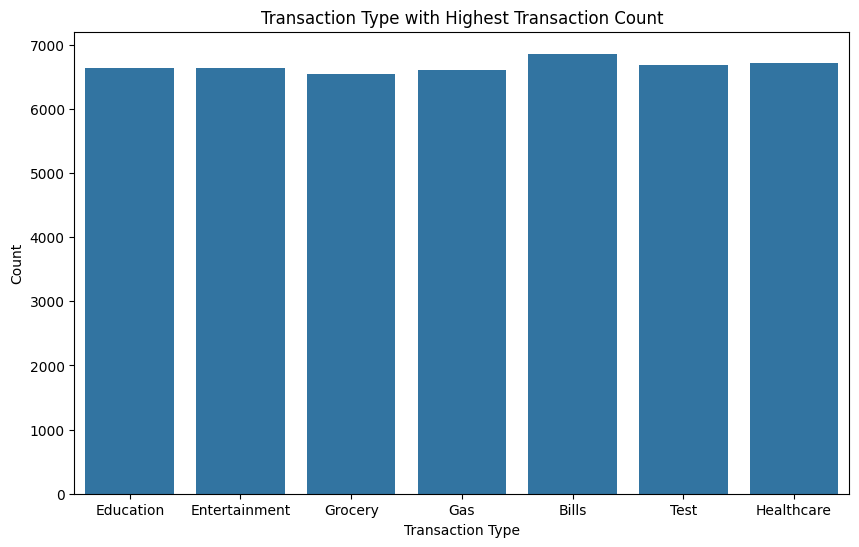

C:\Users\idris\AppData\Local\Temp\ipykernel_38524\718713995.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


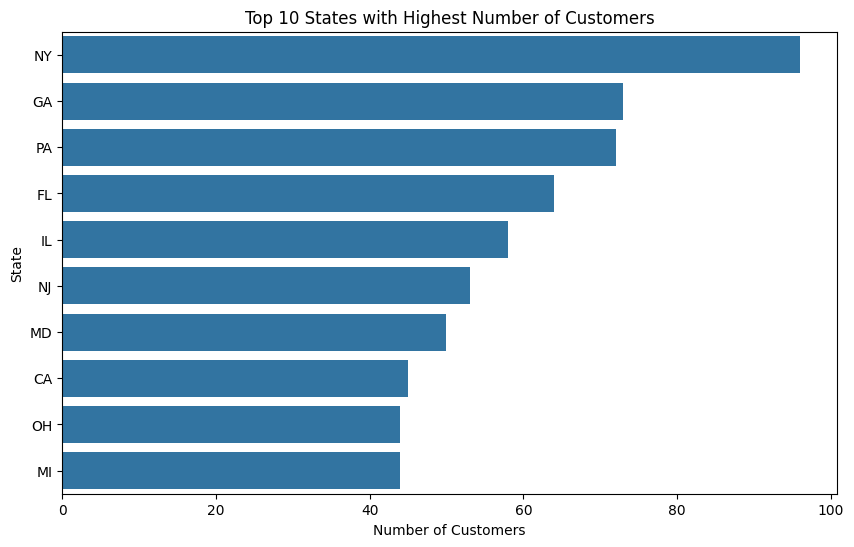

C:\Users\idris\AppData\Local\Temp\ipykernel_38524\718713995.py:56: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


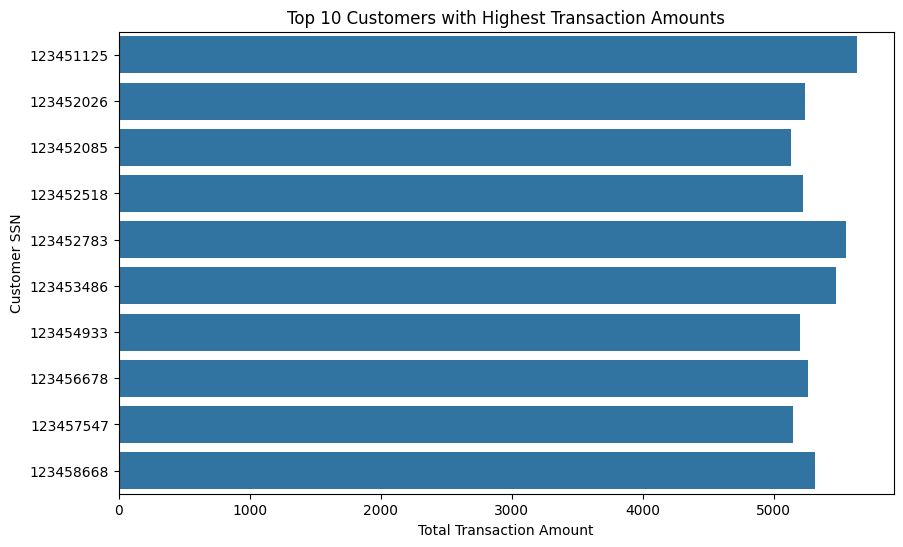

In [ ]:

# 3. Functional Requirements - Data Analysis and Visualization m 
# After data is loaded into the database, users can make changes from the front end, and they can also view data from the front end. Now, the business analyst team wants to analyze and visualize the data.
# Use Python libraries for the below requirements:

import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to get database connection
def get_db_connection():
    db_config = {
        'host': 'localhost',
        'user': 'root',
        'password': 'password',
        'database': 'creditcard_capstone'
    }
    return mysql.connector.connect(**db_config)

# 3.1 Visualization: Transaction Type with Highest Transaction Count
def plot_transaction_type_count():
    conn = get_db_connection()
    query = "SELECT TRANSACTION_TYPE, COUNT(*) as count FROM CDW_SAPP_CREDIT_CARD GROUP BY TRANSACTION_TYPE"
    df = pd.read_sql(query, conn)
    conn.close()

    plt.figure(figsize=(10, 6))
    sns.barplot(x='TRANSACTION_TYPE', y='count', data=df)
    plt.title('Transaction Type with Highest Transaction Count')
    plt.xlabel('Transaction Type')
    plt.ylabel('Count')
    plt.savefig('transaction_type_count.png')
    plt.show()

# 3.2 Visualization: Top 10 States with Highest Number of Customers
def plot_top_states_by_customers():
    conn = get_db_connection()
    query = "SELECT CUST_STATE, COUNT(*) as count FROM CDW_SAPP_CUSTOMER GROUP BY CUST_STATE ORDER BY count DESC LIMIT 10"
    df = pd.read_sql(query, conn)
    conn.close()

    plt.figure(figsize=(10, 6))
    sns.barplot(x='count', y='CUST_STATE', data=df, orient='h')
    plt.title('Top 10 States with Highest Number of Customers')
    plt.xlabel('Number of Customers')
    plt.ylabel('State')
    plt.savefig('top_states_by_customers.png')
    plt.show()

# 3.3 Visualization: Top 10 Customers with Highest Transaction Amounts
def plot_top_customers_by_transaction_amount():
    conn = get_db_connection()
    query = """
    SELECT CUST_SSN, SUM(TRANSACTION_VALUE) as total_amount 
    FROM CDW_SAPP_CREDIT_CARD 
    GROUP BY CUST_SSN 
    ORDER BY total_amount DESC 
    LIMIT 10
    """
    df = pd.read_sql(query, conn)
    conn.close()

    plt.figure(figsize=(10, 6))
    sns.barplot(x='total_amount', y='CUST_SSN', data=df, orient='h')
    plt.title('Top 10 Customers with Highest Transaction Amounts')
    plt.xlabel('Total Transaction Amount')
    plt.ylabel('Customer SSN')
    plt.savefig('top_customers_by_transaction_amount.png')
    plt.show()

# Call functions to generate plots
plot_transaction_type_count()
plot_top_states_by_customers()
plot_top_customers_by_transaction_amount()


In [4]:

#4
#  Access to Loan API Endpoint
# Functional Requirements 4.1
# Create a Python program to GET (consume) data from the above API endpoint for the loan application dataset.
# Functional Requirements 4.2
# Calculate the status code of the above API endpoint.

# Hint: status code could be 200, 400, 404, 401.
# Functional Requirements 4.3
# Once Python reads data from the API, utilize PySpark to load data into RDBMS (SQL). The table name should be CDW-SAPP_loan_application in the database.

# Note: Use the “creditcard_capstone” database.


import requests
import os
from pyspark.sql import SparkSession
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def fetch_data_from_api(url):
    """
    Fetch data from the given API endpoint.

    Args:
        url (str): The URL of the API endpoint.

    Returns:
        dict: JSON data fetched from the API or None if the request fails.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        logging.info(f"Successfully fetched data. Response code: {response.status_code}")
        return response.json()
    except requests.exceptions.RequestException as e:
        logging.error(f"Failed to fetch data from API. Error: {e}")
        return None

def load_to_database(df, url, table, user, password):
    """
    Load a DataFrame into a MySQL database.

    Args:
        df (DataFrame): The Spark DataFrame to load into the database.
        url (str): The JDBC URL for the MySQL database.
        table (str): The table name to load data into.
        user (str): The MySQL username.
        password (str): The MySQL password.
    """
    try:
        df.write.format("jdbc") \
          .mode("overwrite") \
          .option("url", url) \
          .option("dbtable", table) \
          .option("user", user) \
          .option("password", password) \
          .save()
        logging.info(f"Successfully loaded data into the database table: {table}")
    except Exception as e:
        logging.error(f"Failed to load data into the database. Error: {e}")

def loan_application_data_ETL(api_url, db_url, db_table, db_user, db_password):
    """
    Perform the ETL process: fetch data from the API, transform it, and load it into the database.

    Args:
        api_url (str): The URL of the API endpoint.
        db_url (str): The JDBC URL for the MySQL database.
        db_table (str): The table name to load data into.
        db_user (str): The MySQL username.
        db_password (str): The MySQL password.
    """
    data = fetch_data_from_api(api_url)
    if data:
        spark = SparkSession.builder.appName("LoanData").getOrCreate()
        loan_app_df = spark.createDataFrame(data)
        load_to_database(loan_app_df, db_url, db_table, db_user, db_password)

# Environment variables for sensitive information
API_URL = "https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json"
DB_URL = "jdbc:mysql://localhost:3306/creditcard_capstone"
DB_TABLE = "creditcard_capstone.CDW_SAPP_loan_application"
DB_USER = os.getenv('MYSQL_USER', 'root')
DB_PASSWORD = os.getenv('MYSQL_PASSWORD', 'password')

# to run the ETL process
loan_application_data_ETL(API_URL, DB_URL, DB_TABLE, DB_USER, DB_PASSWORD)


2024-07-10 17:53:10,236 - INFO - Successfully fetched data. Response code: 200
2024-07-10 17:53:42,654 - INFO - Successfully loaded data into the database table: creditcard_capstone.CDW_SAPP_loan_application


In [ ]:
from pyspark.sql import SparkSession

spark= SparkSession.builder.appName("Myname").getOrCreate()


data = spark.read.option("multiline",True).json("data.json")
 
data.printSchema()
data.show()

root
 |-- Application_ID: string (nullable = true)
 |-- Application_Status: string (nullable = true)
 |-- Credit_History: long (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- Education: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Income: string (nullable = true)
 |-- Married: string (nullable = true)
 |-- Property_Area: string (nullable = true)
 |-- Self_Employed: string (nullable = true)

+--------------+------------------+--------------+----------+------------+------+------+-------+-------------+-------------+
|Application_ID|Application_Status|Credit_History|Dependents|   Education|Gender|Income|Married|Property_Area|Self_Employed|
+--------------+------------------+--------------+----------+------------+------+------+-------+-------------+-------------+
|      LP001002|                 Y|             1|         0|    Graduate|  Male|medium|     No|        Urban|           No|
|      LP001003|                 N|             1|         1|    G

In [7]:
# Functional Requirement 5.1: Percentage of Approved Applications for Self-Employed Applicants

import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Establish database connection
def get_db_connection():
    # Replace with your database connection details
    user = 'root'
    password = 'password'
    host = 'localhost'
    port = '3306'
    database = 'creditcard_capstone'
    connection_string = f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}'
    engine = create_engine(connection_string)
    return engine.connect()

# Connect to the database and load the loan application data
db_connection = get_db_connection()
query = "SELECT * FROM CDW_SAPP_loan_application"
loan_df = pd.read_sql(query, db_connection)
db_connection.close()

# Print column names to check for discrepancies
print(loan_df.columns)

# Calculate the percentage of applications approved for self-employed applicants
if 'self_employed' in loan_df.columns and 'application_status' in loan_df.columns:
    total_self_employed = loan_df[loan_df['self_employed'] == 'Yes'].shape[0]
    approved_self_employed = loan_df[(loan_df['self_employed'] == 'Yes') & (loan_df['application_status'] == 'Approved')].shape[0]
    percentage_approved = (approved_self_employed / total_self_employed) * 100

    # Plot the data
    plt.figure(figsize=(6, 6))
    plt.pie([percentage_approved, 100 - percentage_approved], labels=['Approved', 'Not Approved'], autopct='%1.1f%%', colors=['#4CAF50', '#FF5252'])
    plt.title('Percentage of Applications Approved for Self-Employed Applicants')
    plt.savefig('self_employed_approved_percentage.png')
    plt.show()
else:
    print("Required columns are not present in the DataFrame.")



Index(['Application_ID', 'Application_Status', 'Credit_History', 'Dependents',
       'Education', 'Gender', 'Income', 'Married', 'Property_Area',
       'Self_Employed'],
      dtype='object')
Required columns are not present in the DataFrame.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data loading (replace with actual database query)
loan_data = pd.read_csv(query, db_connection) 

# Calculate the percentage of approvals for self-employed applicants
total_self_employed = loan_data[loan_data['Self_Employed'] == 'Yes']
approved_self_employed = total_self_employed[total_self_employed['Application_Status'] == 'Approved']
percentage_approved = (len(approved_self_employed) / len(total_self_employed)) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Approved', 'Not Approved'], [percentage_approved, 100 - percentage_approved], color=['green', 'red'])
plt.title('Percentage of Applications Approved for Self-Employed Applicants')
plt.ylabel('Percentage')
plt.savefig('self_employed_approval_percentage.png')
plt.show()


NameError: name 'query' is not defined

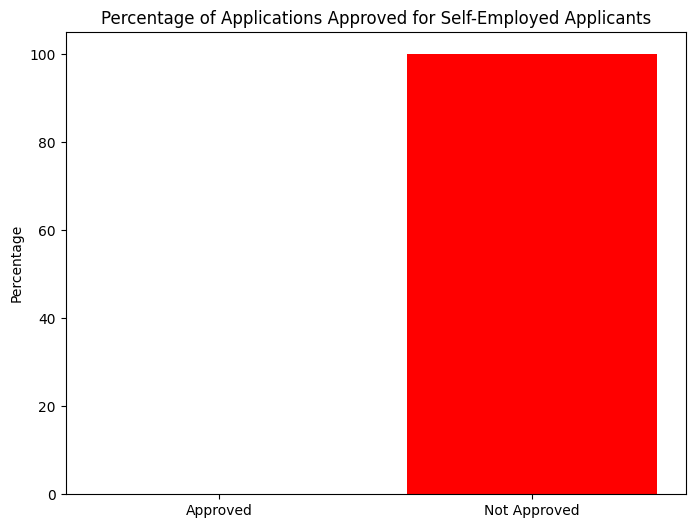

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Define your SQL query and database connection string
query = "SELECT * FROM cdw_sapp_loan_application"  # Replace with your actual query
db_connection_string =  user = 'root'
password = 'password'
host = 'localhost'
port = '3306'
database = 'creditcard_capstone'
connection_string = f'mysql+pymysql://{user}:{password}@{host}:{port}/{database}'
engine = create_engine(connection_string)


# Load data using read_sql
loan_data = pd.read_sql(query, engine)

# Calculate the percentage of approvals for self-employed applicants
total_self_employed = loan_data[loan_data['Self_Employed'] == 'Yes']
approved_self_employed = total_self_employed[total_self_employed['Application_Status'] == 'Approved']
percentage_approved = (len(approved_self_employed) / len(total_self_employed)) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['Approved', 'Not Approved'], [percentage_approved, 100 - percentage_approved], color=['green', 'red'])
plt.title('Percentage of Applications Approved for Self-Employed Applicants')
plt.ylabel('Percentage')
plt.savefig('self_employed_approval_percentage.png')
plt.show()


